Using TensorFlow backend.
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


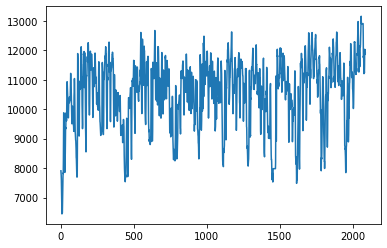

Fit ARIMA: order=(1, 0, 1); AIC=29734.878, BIC=29757.453, Fit time=1.248 seconds
Fit ARIMA: order=(0, 0, 0); AIC=35402.070, BIC=35413.358, Fit time=0.017 seconds
Fit ARIMA: order=(1, 0, 0); AIC=30347.898, BIC=30364.830, Fit time=0.110 seconds
Fit ARIMA: order=(0, 0, 1); AIC=32942.021, BIC=32958.953, Fit time=0.397 seconds
Fit ARIMA: order=(2, 0, 1); AIC=29668.729, BIC=29696.948, Fit time=0.844 seconds
Fit ARIMA: order=(2, 0, 0); AIC=29693.208, BIC=29715.783, Fit time=0.638 seconds
Fit ARIMA: order=(2, 0, 2); AIC=29667.732, BIC=29701.596, Fit time=1.820 seconds
Fit ARIMA: order=(3, 0, 3); AIC=29457.171, BIC=29502.323, Fit time=28.577 seconds
Fit ARIMA: order=(2, 0, 3); AIC=29666.772, BIC=29706.279, Fit time=1.509 seconds
Fit ARIMA: order=(3, 0, 2); AIC=29652.750, BIC=29692.257, Fit time=1.537 seconds
Total fit time: 37.222 seconds
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 2088


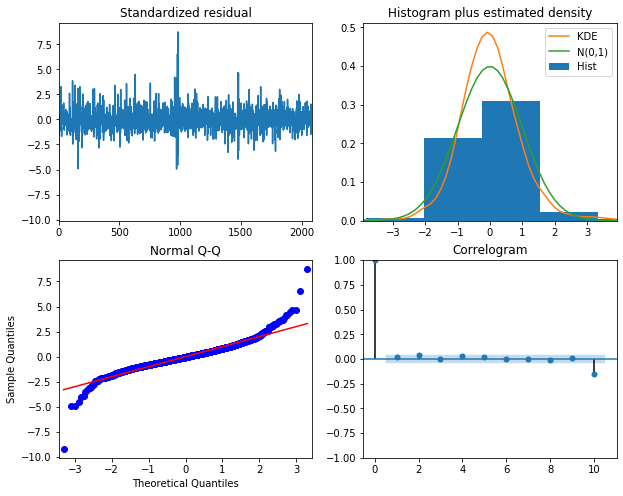

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from keras import regularizers
from keras.constraints import maxnorm
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA, ARIMA
import pmdarima as pm


# The models were done by hour using all the days of the week
data = pd.read_excel("C:/Users/ERIC/Desktop/PML-06MTP-115/06MTP 01012020.xlsm",squeeze=True, sheet_name = 0)

demand = data.iloc[:,3].values
# Plot all the data
plt.figure()
plt.plot(demand)
plt.show()
model = pm.auto_arima(demand, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())
model.plot_diagnostics(figsize=(10,8))
plt.show()

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12355.283051, expected=12575.430000
predicted=12638.108931, expected=12781.200000
predicted=12808.428486, expected=13025.500000
predicted=13056.719919, expected=13152.830000
predicted=13080.991987, expected=12903.580000
predicted=12660.894584, expected=12903.000000
predicted=12786.372204, expected=12903.000000
predicted=12694.929527, expected=12903.000000
predicted=12728.683456, expected=12903.000000
predicted=12733.710121, expected=12903.000000
predicted=12775.028455, expected=12903.000000
predicted=12816.057649, expected=12903.000000
predicted=12850.330342, expected=12903.000000
predicted=12873.920089, expected=12903.000000
predicted=12873.205530, expected=12903.000000
predicted=12854.232714, expected=12903.000000
predicted=12821.273802, expected=12903.000000
predicted=12779.625282, expected=12497.670000
predicted=12179.324667, expected=11751.250000
predicted=11370.152793, expected=11806.080000
predicted=11810.402895, expected=11698.330000
predicted=11479.495603, expected=1

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11116.419646, expected=11350.670000
predicted=11470.240827, expected=11305.750000
predicted=11281.044871, expected=11231.830000
predicted=11270.709103, expected=11502.750000
predicted=11636.206136, expected=12031.920000
predicted=12167.980925, expected=11851.920000
predicted=11615.285631, expected=11935.420000
predicted=11926.682657, expected=12000.420000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11835.877023, expected=11921.920000
32
Test MSE: 42457.580


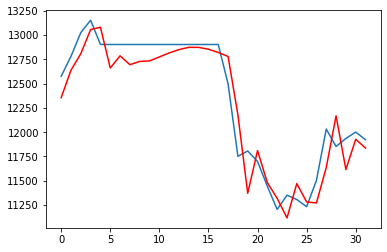

,Pred
0,12355.283051
1,12638.108931
2,12808.428486
3,13056.719919
4,13080.991987
5,12660.894584
6,12786.372204
7,12694.929527
8,12728.683456
9,12733.710121


In [3]:
size = int(len(demand) * 0.985) 
train, test = demand[0:size], demand[size:len(demand)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARMA(history, order=(3,3))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
print(len(predictions))

for i in range(len(predictions)):
    pred = pd.DataFrame(predictions)
pred.columns = ['Pred']
# predictions = pd.DataFrame(predictions)
# predictions.columns = ['Predictions']
# history = pd.DataFrame(history)
# history.columns = ['Expected']
# values = pd.concat(predictions, history)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
pred

In [4]:
model = ARMA(demand, order=(3,3))
model_fit2 = model.fit(disp=0)
forecast_demand = model_fit2.forecast(steps = 48)
forecast_demand = pd.DataFrame(forecast_demand[0])
forecast_demand.columns = ['Demand Predicted']
forecast_demand

,Demand Predicted
0,11757.184590
1,11582.686002
2,11463.253683
3,11408.963489
4,11413.838627
5,11457.368640
6,11509.929633
7,11540.650348
8,11525.613781
9,11454.195180


In [5]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(demand, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=29337.375, BIC=29365.566, Fit time=15.577 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=35564.249, BIC=35575.526, Fit time=0.312 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=30198.970, BIC=30221.522, Fit time=5.820 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=32703.677, BIC=32726.229, Fit time=7.624 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=29289.911, BIC=29323.740, Fit time=20.261 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 0, 12); AIC=29872.618, BIC=29900.809, Fit time=10.783 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=29173.350, BIC=29212.817, Fit time=40.453 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=32584.974, BIC=32618.803, Fit time=53.862 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=29190.672, BIC=29235.777, Fit time=67.613 seconds
Fit 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                 2088
Model:             SARIMAX(1, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood              -14579.675
Date:                                 Thu, 02 Apr 2020   AIC                          29173.350
Time:                                         09:19:59   BIC                          29212.817
Sample:                                              0   HQIC                         29187.814
                                                - 2088                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8404      0.324      2.590      0.010       0.204       1.476
ar.L1          0.9548      0.005    186.230      0.000       0.945       0.965
ma.L1          0.3984      0.011     35.635      0.000       0.377       0.420
ar.S.L12      -0.9999      0.001  -1659.935      0.000      -1.001      -0.999
ma.S.L12      -0.0034      0.034     -0.099      0.921      -0.070       0.064
ma.S.L24      -0.9966      0.015    -67.053      0.000      -1.026      -0.967
sigma2      6.819e+04   5.89e-07   1.16e+11      0.000    6.82e+04    6.82e+04
===================================================================================
Ljung-Box (Q):                      109.72   Jarque-Bera (JB):              5481.08
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.38
Prob(H) (two-sided):                  0.10   Kurtosis:                        10.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.31e+27. Standard errors may be unstable.
"""

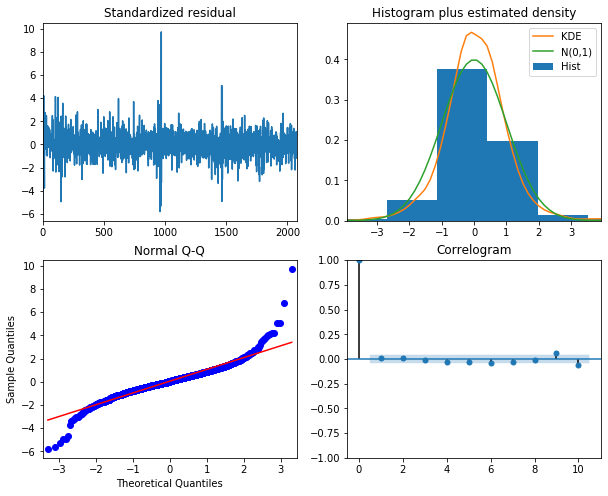

In [6]:
smodel.plot_diagnostics(figsize=(10,8))
plt.show()

In [ ]:
import statsmodels.api as sm
size = int(len(demand) * 0.985) 
train, test = demand[0:size], demand[size:len(demand)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = sm.tsa.statespace.SARIMAX(history,order=(1,0,1),seasonal_order=(1,1,[1,2],12), enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
print(len(predictions))

for i in range(len(predictions)):
    pred = pd.DataFrame(predictions)
pred.columns = ['Pred']
# predictions = pd.DataFrame(predictions)
# predictions.columns = ['Predictions']
# history = pd.DataFrame(history)
# history.columns = ['Expected']
# values = pd.concat(predictions, history)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
pred

In [ ]:
model = sm.tsa.statespace.SARIMAX(history,order=(1,0,1),seasonal_order=(1,1,[1,2],12), enforce_stationarity=False, enforce_invertibility=False)
model_fit2 = model.fit(disp=0)
forecast_demand = model_fit2.forecast(steps = 48)
forecast_demand = pd.DataFrame(forecast_demand)
forecast_demand.columns = ['Demand Predicted']
forecast_demand